In [ ]:
import numpy as np

# Generate 200  angles in radians between 0 and pi (0 and 180 degrees)
phi_values = np.linspace(0, np.pi, 200)

# Corresponding x, y coordinates in Cartesian coordinates
x_coordinates = np.cos(phi_values)
y_coordinates = np.sin(phi_values)

# Combine x and y coordinates into a 2D NumPy array
coordinates_array = np.column_stack((x_coordinates, y_coordinates))
np.savetxt("coordinates.csv", coordinates_array, delimiter=",")

Go to the [evaluation file](evaluate_mics_dpdt.py) to generate this plots


In [ ]:
deltaT = 1/(624 * 15); t = 0.034
n = t/ deltaT; print(n)

f = 3; print("Mic2, ypos = ", f/16)
deltaT

In [ ]:
a = 0.12;  b = 0.2;  c = 0.1
d = (2/3)*b; e = 0.375; r = 1.0

mic3y = f/4 - a/2 - d/2 - (c - d/2)* 0.5
print("Mic3, ypos = ", mic3y)

plot the acoustic pressure or potential at mic1 and mic2 (x = 0 , y = f/16)
for both cases.

The columns in the files are $N_e, x, y, z, Re(v), Im(v), x_e, y_e, z_e$, i.e. element id, global coordinates, value (real and imaginary part), local coordinates. Depending on the dimension and result type (real/complex), the according columns are omitted.

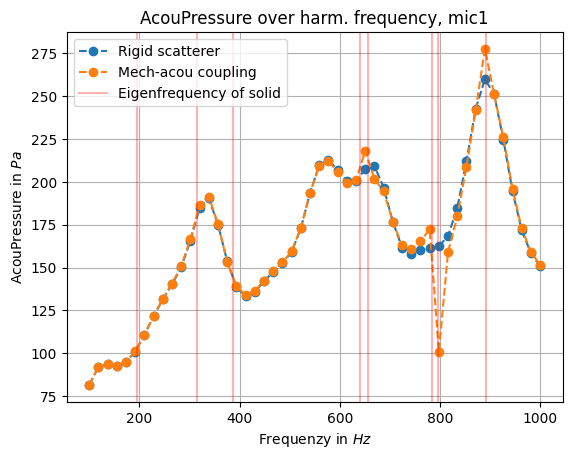

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def gen_freqPressurePlots(data_path, filenames, plt_freqList, pltLabel):
    """ create plot of the acoustic pressure over harmonic freq
    (at characteristic frequencies)"""
    acoupressureList = []
    eigenvals = [195.765223858369, 315.040162359789, 386.669609430478,  641.263432156509,  657.359893578839,
                 784.655849868794, 796.015340170929, 891.819841737318 ]
    for (ind, filename) in enumerate(filenames):
        plotname = filename + ".png"

        flag_savePlots = True

        # - Read Mic data ----------------------------------------------------------------------------------
        coord = []
        p = []
        #for i in range(1, 21):
        for i in range(1, len(plt_freqList) + 1):
            file = f"{data_path}/{filename}-{i}"
            coord.append(np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[1,2], delimiter=',', dtype=float, skiprows=1))
            pxpy = (np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[3,4], delimiter=',', dtype=float, skiprows=1))
            p.append( np.sqrt( pxpy[0]**2 + pxpy[1]**2 ) )

        p = np.array(p)
        freqs = np.array(plt_freqList)
        acoupressureList.append(p)
        
        plt.plot(freqs, p, "o--", label = pltLabel[ind])
        
    for (i, eval) in enumerate(eigenvals):
        if (i == len(eigenvals)-1):
            plt.axvline(eval, color='red', alpha=0.3, label ="Eigenfrequency of solid")
        else:
            plt.axvline(eval, color='red', alpha=0.3)
            

    plt.legend()
    plt.title("AcouPressure over harm. frequency, mic1")
    plt.grid(); plt.xlabel("Frequenzy in $Hz$"); plt.ylabel("AcouPressure in $Pa$")
    if flag_savePlots:
        plt.savefig("images/"+plotname, bbox_inches='tight', transparent=False)

    plt.show()
    return acoupressureList


data_path = "/home/petrar/PetraMaster/WS23/CSE_Sem3/FEM-Multiphys/Aucoustic/history"  # Path to mics folder

files_Coupled = "mic1-coupledsys"; files__Rigid = "mic1-soundhard2"
flist = [files__Rigid, files_Coupled]; Llist = ["Rigid scatterer" ,"Mech-acou coupling"]

freqlist2 = list( np.linspace(100,1000,50) )

rigid, coupled = gen_freqPressurePlots(data_path, flist, freqlist2, Llist) 

# Find the indices of the 5 maximum absolute values
indices = np.argsort(np.abs(coupled-rigid))[-5:]
charfreqs = []
differences = []

for i in indices:
    charfreqs.append(freqlist2[i])
    differences.append( abs( coupled[i] - rigid[i]   )  )

In [2]:
import pandas as pd
charfreqs = np.array(charfreqs)[::-1]
differences = np.array(differences)[::-1]

df = pd.DataFrame({'Freq. index': indices, 'Freq. value': charfreqs, 'Deviation of acoupressure': differences})
df

,Freq. index,Freq. value,Deviation of acoupressure
0,39,797.959184,61.552672
1,30,889.795918,17.762775
2,37,779.591837,10.736809
3,43,651.020408,10.733186
4,38,816.326531,9.288787


In [ ]:
freqlist2 = list( charfreqs )
type(freqlist2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data_path = "/home/petrar/PetraMaster/WS23/CSE_Sem3/FEM-Multiphys/Aucoustic/mics_dpdt"  # Path to mics folder


Nsteps = 319; deltaT = 1/(624 * 15)
data_path = "/home/petrar/PetraMaster/WS23/CSE_Sem3/FEM-Multiphys/Aucoustic/history"
name1 = "mic1-soundhard-trans"; name2="mic2-soundhard-trans"
name1t = "mic1-flexiblescat_trans"; name2t="mic2-flexiblescat_trans"; name3t = "mic3-flexiblescat_trans"

p1 = []; p2 = []; t = []
p1tr = []; p2tr =[]; p3tr = []

for i in range(1, Nsteps + 1):
    #realPress = np.loadtxt(file_path, usecols=[2], delimiter='\t', dtype=float, skiprows=1)
    p1.append(np.loadtxt(f"{data_path}/{name1}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
    p2.append(np.loadtxt(f"{data_path}/{name2}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
    
    p1tr.append(np.loadtxt(f"{data_path}/{name1t}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
    p2tr.append(np.loadtxt(f"{data_path}/{name2t}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
    displ = np.loadtxt(f"{data_path}/{name3t}-{i}", usecols=range(3, 5), delimiter=',', dtype=float, skiprows=1)
    p3tr.append( np.linalg.norm(displ) )   #mech displ
    
    t.append(i *deltaT)

p1 = np.array(p1); p2 = np.array(p2); 
p1tr = np.array(p1tr); p2 = np.array(p2tr); p3tr = np.array(p3tr)

#Mic 1------------------------------------------------------------------------
plt.figure(dpi = 115)
plt.plot(t, p1, label="Mic1 rigid")
plt.plot(t, p1tr, label="Mic1 coupled")
plt.legend(); plt.grid(); plt.xlabel("Time $t$"); plt.ylabel("AcouPressure [Pascal]")
plt.title("Transient acoustic pressure, mic1")
plt.savefig("images/ptrans-mic1.png");plt.show()

# Plot for the first half
fig, ax = plt.subplots(2, 1, figsize=(6, 8))# Get the first half of the data
half_index = len(t) // 2
ax[0].plot(t[:half_index], p1[:half_index], label="Mic1 rigid")
ax[0].plot(t[:half_index], p1tr[:half_index], label="Mic1 coupled")
ax[0].grid()
ax[0].set_ylabel("Acoustic Pressure [Pascal]")
ax[0].legend()

# Plot for the second half
ax[1].plot(t[half_index:], p1[half_index:], label="Mic1 rigid")
ax[1].plot(t[half_index:], p1tr[half_index:], label="Mic1 coupled")
ax[1].grid()
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel("Acoustic Pressure [Pascal]")
ax[1].legend()
plt.savefig("images/ptrans-mic1-sublots.png");plt.show()


#mic2------------------------------------------------------------------------------
plt.figure(dpi = 115)
plt.plot(t, p2, label="Mic2 rigid ")
plt.plot(t, p2tr, label="Mic2 coupled")
plt.grid(); plt.xlabel("Time $t$"); plt.ylabel("AcouPressure [Pascal]")
plt.title("Transient acoustic pressure, mic2")
plt.savefig("images/ptrans-mic2.png");plt.show()

fig, ax = plt.subplots(2, 1, figsize=(6, 8))# Get the first half of the data
half_index = len(t) // 2
# Plot for the first half
ax[0].plot(t[:half_index], p2[:half_index], label="Mic2 coupled")
ax[0].plot(t[:half_index], p2tr[:half_index], label="Mic2 coupled")
ax[0].grid()
ax[0].set_ylabel("Acoustic Pressure [Pascal]")
ax[0].legend()

# Plot for the second half
plt.figure(dpi = 115)
ax[1].plot(t[half_index:], p2[half_index:], label="Mic2 rigid")
ax[1].plot(t[half_index:], p2tr[half_index:], label="Mic2 coupled")
ax[1].grid()
ax[1].set_xlabel("Time $t$")
ax[1].set_ylabel("Acoustic Pressure [Pascal]")
ax[1].legend()

plt.title("Transient acoustic pressure, mic2")
plt.savefig("images/ptrans-mic2-sublots.png");plt.show()

    
plt.plot(t, p3tr, label="Mic3") ;plt.legend(); 
plt.grid(); plt.xlabel("Time $t$"); plt.ylabel("MechDispl Amplitude [meters]")
plt.title("Transient diplacement of mic3")
plt.savefig("images/displtrans-mic3.png");plt.show()


[797.9591836734694]


[889.795918367347]
[779.591836734694]
[651.0204081632653]
[816.3265306122449]


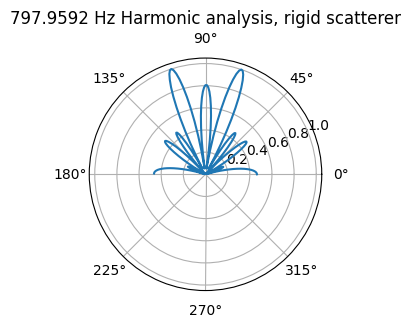

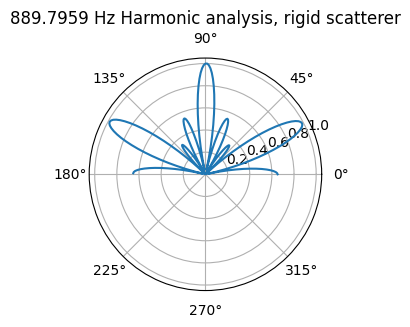

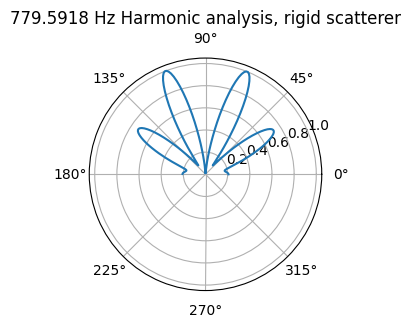

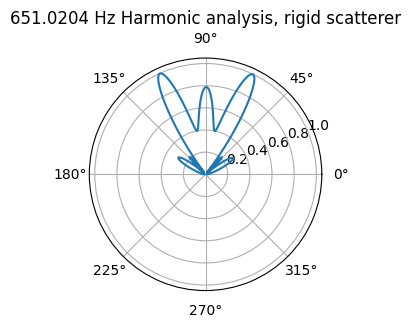

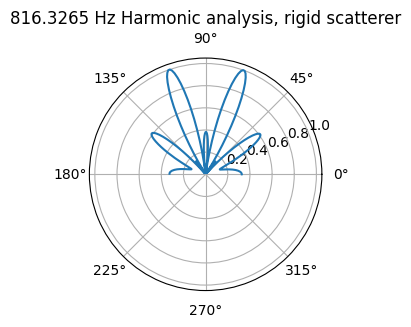

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal.windows
from matplotlib import rc

# rc('text', usetex=True)
from scipy.fft import rfft, rfftfreq

import scipy
from scipy.fft import rfft, rfftfreq

def gen_polarplots(data_path, filename, plt_freqList, title, indices=None, Herz = None):
    """ create a polar plot of the acoustic pressure at
    the radius of 1 m around the excitation and compare it to sound hard BC
    (at characteristic frequencies)"""

    ts = 1e-3  # Sample time in s
    plotname = "/home/petrar/PetraMaster/WS23/CSE_Sem3/FEM-Multiphys/Aucoustic/images/RigidvsNofilename"+ filename + ".png"
    # - Read Mic data ----------------------------------------------------------------------------------

    coord = []
    p = []
    if indices is None:
        for i in range(1, len(plt_freqList) + 1):
            file = f"{data_path}/{filename}-{i}"
            coord.append(np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[1,2], delimiter=',', dtype=float, skiprows=1))
            p.append(np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
    else:
        for i in indices:
            file = f"{data_path}/{filename}-{i}"
            coord.append(np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[1,2], delimiter=',', dtype=float, skiprows=1))
            p.append(np.loadtxt(f"{data_path}/{filename}-{i}", usecols=[3], delimiter=',', dtype=float, skiprows=1))
        

    p = np.array(p)

    # - Calculate FFT ----------------------------------------------------------------------------------

    startStep = 0

    yf = []

    win = scipy.signal.windows.hann(p.shape[0] - startStep, True)

    for i in range(p.shape[1]):
        y = p[startStep:, i] * win
        yf.append(abs(rfft(y)))

    yf = np.array(yf)
    xf = rfftfreq(p.shape[0] - startStep, ts)

    # - Directivity plot ----------------------------------------------------------------------------------

    theta = np.arange(0, np.pi, np.pi / p.shape[1])
    #ax = plt.subplot(111, projection='polar')
    plt.figure(figsize=(3,5))

    for plt_freq in plt_freqList:
        index_plt = np.argmin(abs(xf - plt_freq))
        yf_plt = yf[:, index_plt] / max(yf[:, index_plt])
        plt.polar(theta, yf_plt)

    plt.title( Herz+ title)

    plt.savefig(plotname, bbox_inches='tight', transparent=False)

    #plt.show()






data_path = "/home/petrar/PetraMaster/WS23/CSE_Sem3/FEM-Multiphys/Aucoustic/mics_dpdt/harmonic-coupled/"  # Path to mics folder

files_Coupled = "micArrayResults_1m_acouPressureCoupled"
files__Rigid = "micArrayResults_1m_acouPressureRigid"

files_Noscat = "micArrayResults_1m_acouPressureNoScatterer"
files_Scat = "micArrayResults_1m_acouPressureScatterer"

flist = []; indices_list=[]; info =[]
for i in range(len(charfreqs)):
    flist.append([charfreqs[i]])
    indices_list.append([indices[i]])
    formatted_str = f"{charfreqs[i]:.4f}"
    info.append(formatted_str + " Hz ")
    

for (i, fi) in enumerate( flist):
    print(fi)
    gen_polarplots(data_path, files__Rigid, fi, "Harmonic analysis, rigid scatterer", indices_list[i], info[i])  
    #gen_polarplots(data_path, files_Coupled, fi, "Harmonic analysis, coupling",indices_list[i], info[i])